In [1]:
from __future__ import print_function
__author__= 'bt1085@nyu.edu'
import os

from scipy.optimize import curve_fit, minimize

import numpy as np
import pylab as pl
import json
%pylab inline

md={}

Populating the interactive namespace from numpy and matplotlib


In [2]:
distributions = ['chisq', 'pois', 'gaus', 'binomial', 'rayleigh', 'wald']

In [3]:
myMean = 50
means = {}

In [4]:
mysize = np.random.randint(10,2000,100)

for dst in distributions:
    md[dst] = {}

# 1. Chisq

In [5]:
for n in mysize:
    md['chisq'][n] = np.random.chisquare(myMean, size=n)
    
means['chisq'] = {}

for nn in md['chisq'].iterkeys():
    means['chisq'][nn] = md['chisq'][nn].mean()

# 2. Poisson Distribution

In [6]:
for n in mysize:
    md['pois'][n] = np.random.poisson(myMean, size=n)

means['pois'] = {}

for nn in md['pois'].iterkeys():
    means['pois'][nn] = md['pois'][nn].mean()

# 3. Binomal Distribution

In [7]:
for n in mysize:
    md['binomial'][n] = np.random.binomial(myMean/0.5, 0.5, size=n)

means['binomial'] = {}

for nn in md['binomial'].iterkeys():
    means['binomial'][nn] = md['binomial'][nn].mean()

# 4. Gaussian Distribution

In [8]:
sigma = 5

for n in mysize:
    md['gaus'][n] = np.random.normal(myMean, sigma, 1000)

means['gaus'] = {}

for nn in md['gaus'].iterkeys():
    means['gaus'][nn] = md['gaus'][nn].mean()

# 5. Rayleigh Distribution

In [9]:
sigma = 5

for n in mysize:
    md['rayleigh'][n] = np.random.rayleigh(myMean/(sqrt(np.pi/2)), 1000)
    
means['rayleigh'] = {}

for nn in md['rayleigh'].iterkeys():
    means['rayleigh'][nn] = md['rayleigh'][nn].mean()

# 6. Wald

In [10]:
dispersion = 100

for n in mysize:
    md['wald'][n] = np.random.wald(myMean, 100, 1000)
    
means['wald'] = {}

for key in md['wald']:
    means['wald'][key] = md['wald'][key].mean()

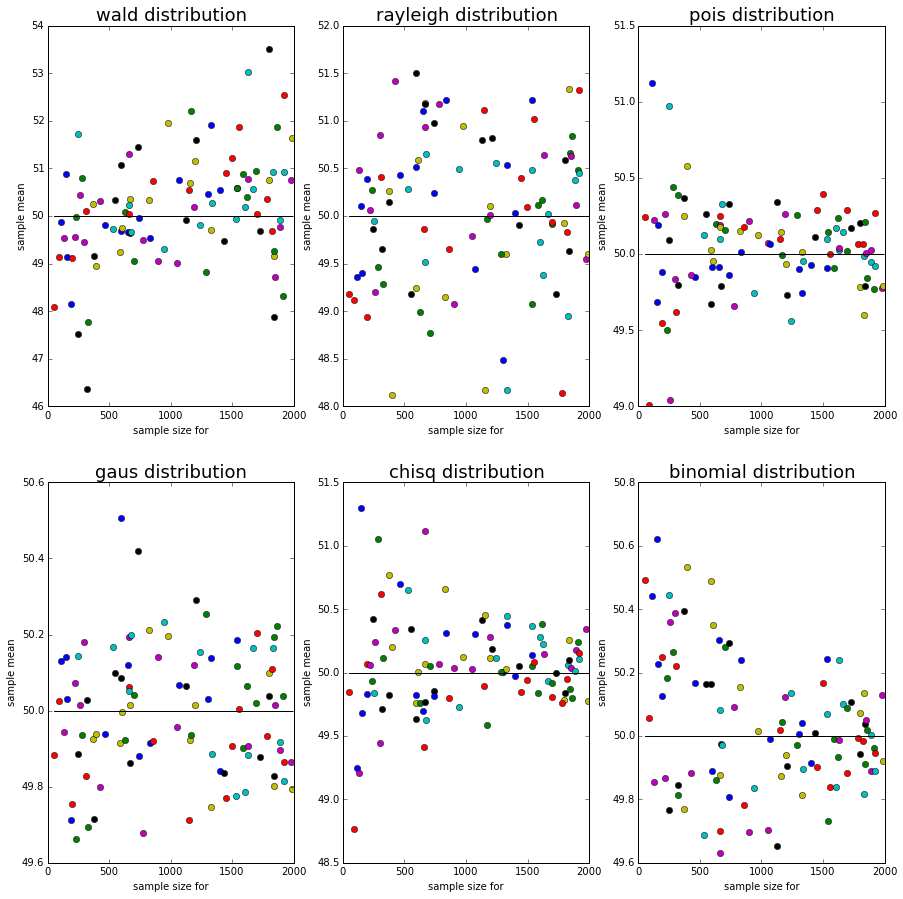

In [11]:
fig_mu_N = pl.figure(figsize=(15,15))

axsId = 231
for key, dst in md.iteritems():
    axsds = fig_mu_N.add_subplot(axsId)
    for nn in md[key].iterkeys():
        axsds.plot(nn, means[key][nn], 'o')
        axsds.set_xlabel('sample size for')
        axsds.set_ylabel('sample mean')
        axsds.set_title('%s distribution' % (key), fontsize=18)
        axsds.plot([min(mysize), max(mysize)],[myMean,myMean], 'k')
    axsId += 1
        
        

## It looks as I expected that when sample size increases distribution mean is more closer to the population mean

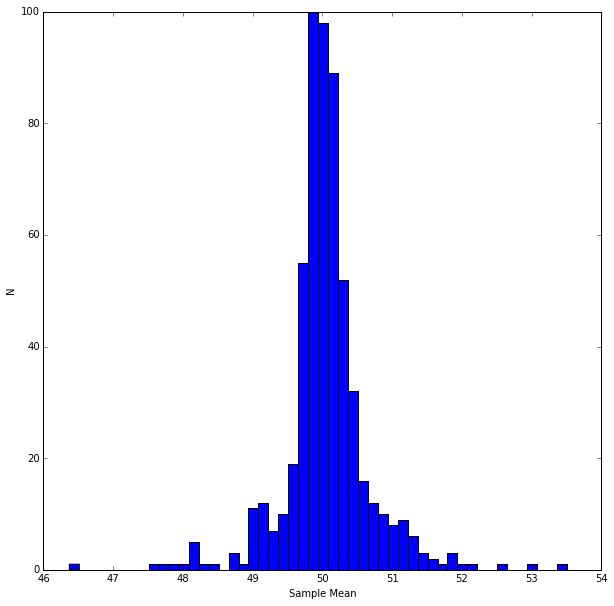

In [12]:
all_means = []

for dkey in means:
    for sizekey in means[dkey]:
        all_means.append(means[dkey][sizekey])
        
pl.figure(figsize=(10,10))
pl.hist(all_means, bins=50)
pl.xlabel('Sample Mean')
pl.ylabel('N')

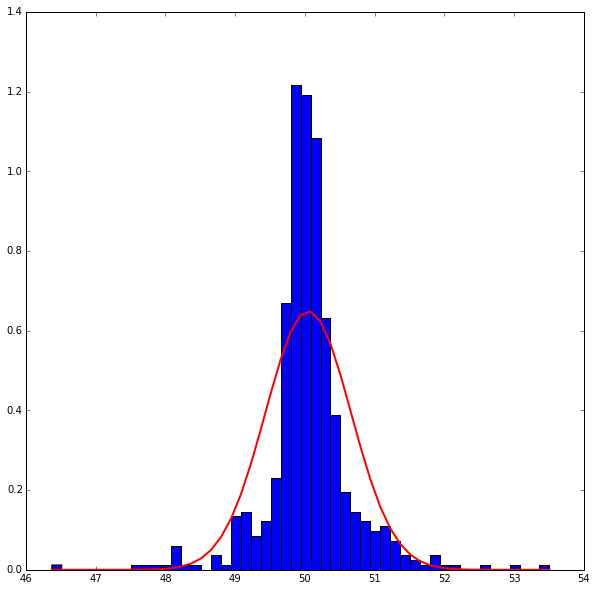

In [15]:
from scipy.stats import norm
import matplotlib.mlab as mlab

(mu, sigma) = norm.fit(all_means)
pl.figure(figsize=(10,10))
n, bins, patches=pl.hist(all_means,normed=1,bins=50)
y = mlab.normpdf( bins, mu, sigma)
l = pl.plot(bins, y, 'r', linewidth=2)